##### Султонов Азамат, 303 группа

# Задача 4.7

Для излучения атома используется модель в виде цуга затухающих
колебаний, задаваемого функцией:
$$\begin{equation*}
\xi(t) = 
 \begin{cases}
   a\exp(-t / \tau_0)\sin \Omega t &\text{$t > 0$}\\
   0 &\text{$t < 0$}
 \end{cases}
\end{equation*}$$
где $\tau_0 \Omega >> 1$. Здесь $\Omega$ – частота излучения, $\tau_0$ – радиационное время жизни атома. Найти 
спектр излучения атома $S(\omega)$. Получить лоренцову форму линии излучения $S(\omega)$ атома 
в окрестности частоты излучения $\Omega$, используя условие $\tau_0 \Omega >> 1$ и полагая, что $\omega - \Omega << \omega, \Omega$. Построить графики излучения $\xi(t)$ и его спектра $S(\omega)$ при $\tau_0 \Omega = 3, 10, 100$. 
Рассмотреть характер изменения спектра при $\tau_0 \rightarrow \infty$. Оценить радиационное 
уширение спектра излучения He-Ne лазера, если радиационное время жизни атома 
$\tau \approx 10^{-8}$ с.

## Решение

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import *

In [2]:
def xi(t, a, tau_0, Omega):
    if t > 0:
        return a*exp(-t/tau_0)*sin(Omega*t)
    else:
        return 0

### 1. Спектр

$
S(\omega) = \frac{a}{2\pi} \frac{\Omega \tau_0^2}{\Omega^2 \tau_0^2 + (1 + i\omega \tau_0)^2}
$

### 2. Графики

In [3]:
def S(w, a, tau_0, Omega):
    return a/(2*pi)*(Omega*tau_0**2)/(Omega**2 * tau_0**2 + (1 + complex(0,1)*w*tau_0)**2)

In [4]:
def show(a, Omega, tau_0):
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    t = np.arange(0, 16, 0.01)
    xi_vals = np.asarray([xi(t_, a, tau_0, Omega) for t_ in t])
    ax[0].set_title('Исходная функция\n' + r'$a = %d, \Omega = %d, \tau_0 = %d$' % (a, Omega, tau_0))
    ax[0].set_xlabel('t')
    ax[0].set_ylabel(r'$\xi(t)$')
    ax[0].plot(t, xi_vals)
    
    w = np.arange(-6, 6, 0.01)
    S_real = np.asarray([S(w_, a, tau_0, Omega).real for w_ in w])
    S_imag = np.asarray([S(w_, a, tau_0, Omega).imag for w_ in w])
    ax[1].set_title('Спектр\n' + r'$a = %d, \Omega = %d, \tau_0 = %d$' % (a, Omega, tau_0))
    ax[1].set_xlabel(r'$\omega$')
    ax[1].set_ylabel(r'$S(\omega)$')
    ax[1].plot(w, S_real, label=r'Re part', color='blue')
    ax[1].plot(w, S_imag, label=r'Im part', color='red')
    ax[1].legend()
    for i in range(2):
        ax[i].grid()
a = 3

#### 2.1. $\tau_0\Omega = 3$

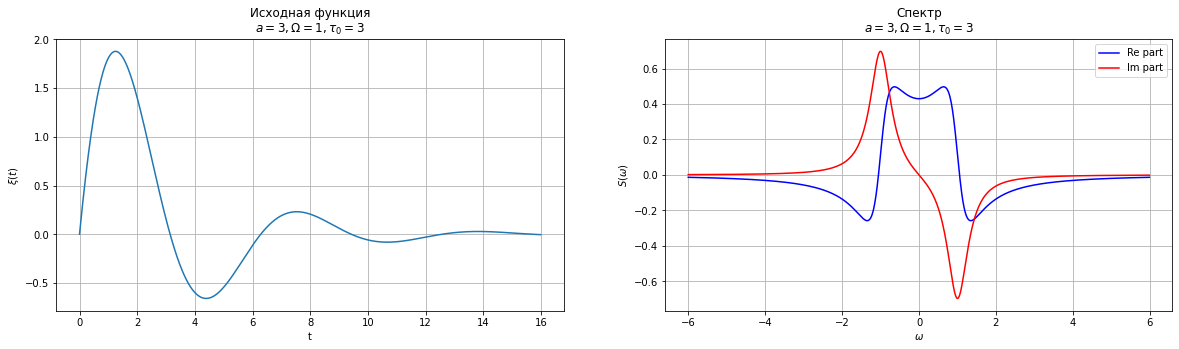

In [5]:
show(a, 1, 3)

#### 2.2. $\tau_0\Omega = 10$

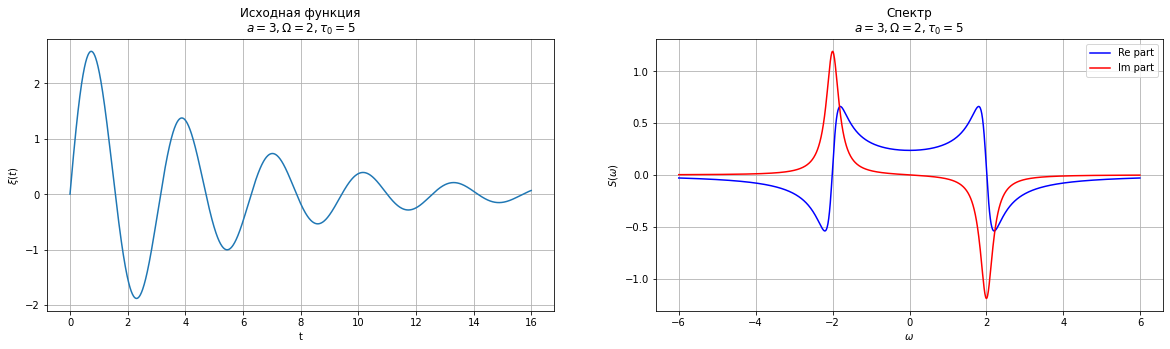

In [6]:
show(a, 2, 5)

#### 2.3. $\tau_0\Omega = 100$

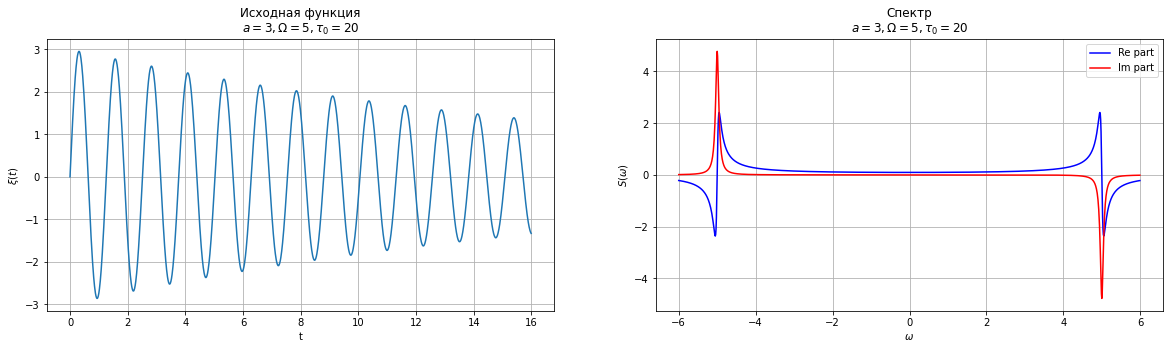

In [7]:
show(a, 5, 20)

### 3. $\tau_0 \rightarrow \infty$ 

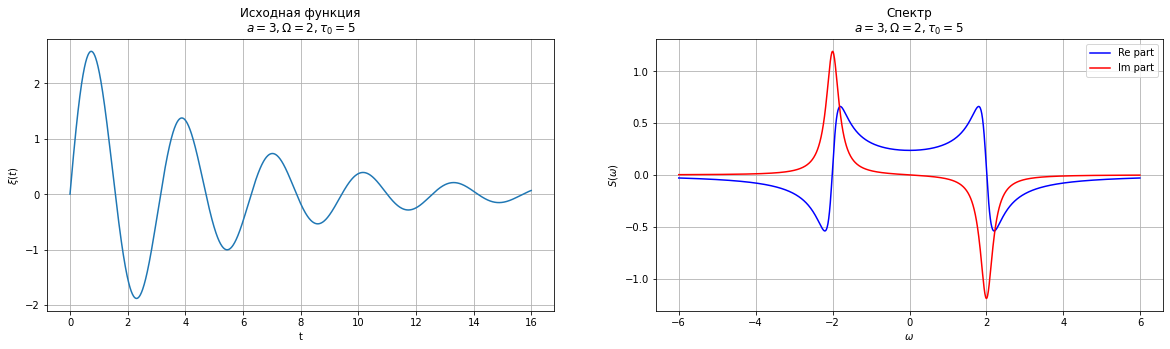

In [8]:
show(a, 2, 5)

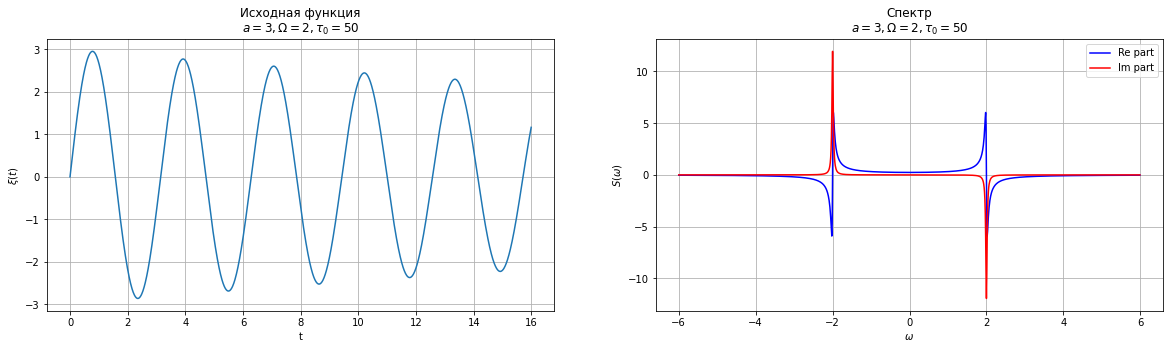

In [9]:
show(a, 2, 50)

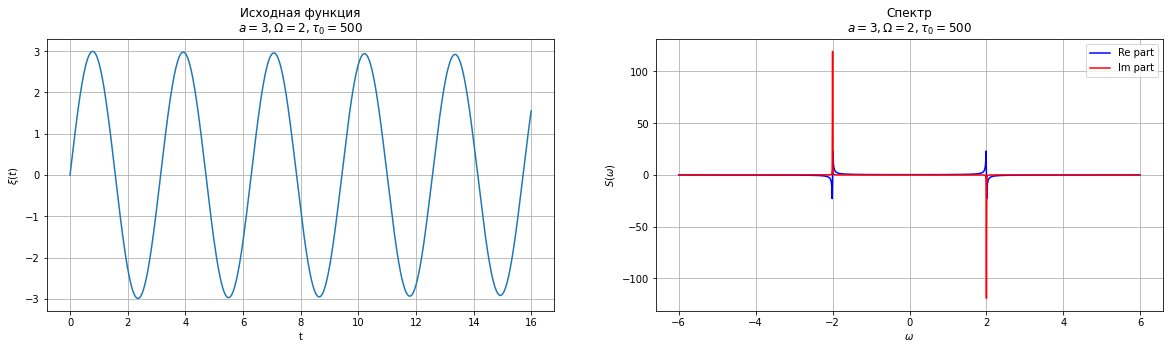

In [10]:
show(a, 2, 500)

Видно, что при $\tau_0 \rightarrow \infty$ уменьшается ширина спектра, что и ожидалось по теореме о ширине частотной полосы.

### 4. Лоренцнва форма линии

$
S(\omega) = \frac{a}{2\pi} \frac{\Omega \tau_0^2}{\Omega^2 \tau_0^2 + (1 + i\omega \tau_0)^2} = \frac{a}{2\pi}\frac{\Omega\tau_0^2(\tau_0^2(\Omega^2 - \omega^2) + 1)}{((\tau_0^2(\Omega^2 - \omega^2) + 1)^2 + 4\omega^2\tau_0^2} - i\frac{a}{2\pi}\frac{\Omega\tau_0^3\omega}{((\tau_0^2(\Omega^2 - \omega^2) + 1)^2 + 4\omega^2\tau_0^2}
$

$
ImS(\omega) \rightarrow -\frac{a}{\pi}\frac{\tau_0}{\tau_0^2(\Omega - \omega)^2 + 4}\ \ \ \ при\ \Omega\tau_0 >> 1,\ \omega - \Omega << \omega, \Omega.
$

### 5. Уширение

Время жизни атома $\tau \approx 10^{-8}$ с. По теореме о ширине частотной полосы:
$$
\Delta\omega\tau \geq 2\pi \Rightarrow \Delta\omega\geq 10^8
$$

Для $He$-$Ne$ лазера ширина спектральной полосы в основном определяется доплеровским уширением:
$$
\Delta\omega = \omega_0\frac{v}{c}cos\theta, cos\theta \in [-1, 1] \Rightarrow \delta\omega = 2\omega_0\frac{v_{ср}}{c} = 2\omega_0\sqrt{\frac{8kT}{\pi mc^2}}
$$

Вывод на основе распределения Максвелла приводит к 
формуле для полуширины линии:
$$
\delta\omega = 2\omega_0\sqrt{\frac{2kT\ln2}{mc^2}}
$$

При температуре $Т = 400K$ полуширина линии излучения равна $\delta\omega = 9,42\cdot10^9 [\frac{рад}{с}]$